# Tutorial 1 - Introduction to Constraint Programming
## In other words, get ready to have your mind blown.. 


## Introduction & Context


Constraint Programming is a rich declarative approach to solve combinatorial problems. This approach has been used to solve diverse real word applications such as scheduling, timetabling, planning, routing, supply chain, clustreing, data mining, classification, etc. See for instance https://www.a4cp.org/node/1281.

    
Constraint programming can be used to solve decision or optimisation problems. In both families, a problem must be stated as : 
- A set of variables (the unkown of the problem). Each variable $x$ is associated to a set of values $D(x)$ that is called to domain of $x$. The latter represents the possible values that $x$ can take. We will be using mostly integer finite variables. That is, a type of variables whose domain is a finite subset of  $\mathbb{Z}$
- A set of constraints. Each constraint restrics the possible combinantion of values allowed by the different varialbes in the scope of the constraint. For instance, the constraint $x<y$ restrics the value assigned to x to be less than the value assigned to y

A constraint can be seen as a (sub-)problem itself. In that sence, a problem can be defined as a conjunction of smaller problems. 


In a decision problem, for each variable $x$, the task is to assign a value from $\cal D(x)$ to $x$ such that every constraint is satisfied. In an opptimisation problem, the purpose is exactly the same, however, among all the possible solutions, we look for one that minimises or maximizes an objective function. 

We will be working on both decision and optimition problems. Throughout these tutorials, we focus on the modelling aspect of constraint programming along with a solid understanding of what is happening within a solver. 


We find many constraint solvers in the literature that are developped by both acamemics (for instance http://www.choco-solver.org/, miniCP http://www.minicp.org/, and GeCode https://www.gecode.org/) and industrials (for instance Google OR Tools https://developers.google.com/optimization and IBM ILOG CPLEX CP Optimizer https://www.ibm.com/products/ilog-cplex-optimization-studio). 

For an up-to-date list of solvers, you can have a look at the following two annual solver competitions: 
- Minizinc Challenge https://www.minizinc.org/challenge.html : the list of solvers can be found here https://www.minizinc.org/challenge2019/results2019.html
- http://xcsp.org/competition some  solvers can be found here http://www.cril.univ-artois.fr/XCSP19/results/results.php?idev=99 



## CpOptimizer


In these tutorials, we will be using [IBM ILOG CPLEX CP Optimizer](https://www.ibm.com/analytics/cplex-cp-optimizer). This tool is an industrial constraint programming solver developped by IBM (previously [ILOG](https://en.wikipedia.org/wiki/ILOG)). The solver supports many programming languages and plateforms. We will be using a python interface called docplex. 


### `docplex` - A python interface to CpOptimizer

`docplex` is a python package that can be used to solve constraint programming problems in python using either:

- a local installation of CpOptimizer;
- a cloud version of CpOptimizer (requires an account and credentials from IBM).

While being less versatile than the C++ interface of CpOptimizer, it is much easier and much more convenient to use.

Throughout the different tutorials, you are required to consult regularly the documentation [`docplex` constraint programming documentation](http://ibmdecisionoptimization.github.io/docplex-doc/cp/index.html).


*Note: While `docplex` is a python interface developped by IBM/ILOG and dedicated to `CpOptimizer` and `Cplex`, there are other interfaces that can be used to model and solve optimization problems in python using various backends such as Numberjack https://github.com/eomahony/Numberjack


### Working locally (<font color='red'>DON'T DO THIS DURING THE TUTORIALS</font> )

If you want to install the solver locally you need to request an academic liscence and follow the installation step (a bit tidious). Once it's installed you'll need to chance the init file in the config folder to include your path. 
 


### <font color='blue'>Few things</font>

Keep in mid that you are expected to read the documentation along the way. You will be trained to be autonomous. You will code everything by yourself. You can of course discuss with your friends but the work is individual. Your teacher is there to help on the modelling and high-level aspect of CP, not the technical details. 



### <font color='red'>Let's get started!</font>

## HELLO CP! 

First, you need to run the following python statements at the beginning of each notebook (and every time you restart a notebook). If you see a warning message, you need to run it again. 

In [1]:
#Make sure that you update the variable os.environ['PATH'] in the config/__init__.py file
from config import setup
setup()

**Exercice 1**: Create a simple model using `docplex` with:

- 3 variables $x$, $y$, $z$
- the same domain $\cal{D} = \left\{1, 2, 3\right\}$ for each variable
- the following constraints: $x \ne y$, $x \ne z$, $y \ne z$

The first step is to import the following

```python
from docplex.cp.model import *
from docplex.cp.config import get_default
```

**Step by step guidance**:

To create the model :  
```python
mdl = CpoModel(name='My first docplex model')
```

- Create variable using [`CpoModel.integer_var`](http://ibmdecisionoptimization.github.io/docplex-doc/cp/docplex.cp.expression.py.html#docplex.cp.expression.integer_var), [`CpoModel.integer_var_list`](http://ibmdecisionoptimization.github.io/docplex-doc/cp/docplex.cp.expression.py.html#docplex.cp.expression.integer_var_list) or [`CpoModel.integer_var_dict`](http://ibmdecisionoptimization.github.io/docplex-doc/cp/docplex.cp.expression.py.html#docplex.cp.expression.integer_var_dict).

For instance: 
```python
x, y, z = mdl.integer_var_list(3, 1, 3, 'x')
```

- Add constraints using [`CpoModel.add`](http://ibmdecisionoptimization.github.io/docplex-doc/cp/docplex.cp.model.py.html#docplex.cp.model.CpoModel.add) using the common $!=$ logical expression.

```python
mdl.add(x != y)
```

In [2]:
## install docplex first with $pip install docplex
from docplex.cp.model import *
from docplex.cp.config import get_default

##Complete Here
mdl = CpoModel(name='Cellias model')
x, y, z = mdl.integer_var_list(3,1,3,'x')
mdl.add(x != y)
mdl.add(x != z)
mdl.add(y != z)

**Exercice**: Solve the model you just created (see `CpoModel.solve()`) and print the solution found.

**Tips**: 

- Use [`CpoModel.solve`](http://ibmdecisionoptimization.github.io/docplex-doc/cp/docplex.cp.model.py.html#docplex.cp.model.CpoModel.solve) to solve the model:

```python
sol = mdl.solve()
```

- Use [`CpoSolveResult.print_solution`](http://ibmdecisionoptimization.github.io/docplex-doc/cp/docplex.cp.solution.py.html#docplex.cp.solution.CpoSolveResult.print_solution) to get an overview of the solution:

```python
sol.print_solution()
```


In [3]:
sol = mdl.solve()
sol.print_solution()

 ! ----------------------------------------------------------------------------
 ! Satisfiability problem - 3 variables, 3 constraints
 ! Workers              = 1
 ! Presolve             = Off
 ! SearchType           = DepthFirst
 ! Initial process time : 0.00s (0.00s extraction + 0.00s propagation)
 !  . Log search space  : 4.8 (before), 4.8 (after)
 !  . Memory usage      : 266.8 kB (before), 266.8 kB (after)
 ! Using sequential search.
 ! ----------------------------------------------------------------------------
 !               Branches  Non-fixed            Branch decision
 *                      2  0.00s                  2  = x_2
 ! ----------------------------------------------------------------------------
 ! Search completed, 1 solution found.
 ! ----------------------------------------------------------------------------
 ! Number of branches     : 2
 ! Number of fails        : 0
 ! Total memory usage     : 539.5 kB (499.9 kB CP Optimizer + 39.6 kB Concert)
 ! Time spent in


- Use [`CpoSolveResult.get_value`](http://ibmdecisionoptimization.github.io/docplex-doc/cp/docplex.cp.solution.py.html#docplex.cp.solution.CpoSolveResult.get_value) or `CpoSolveResult.__getitem__` to retrieve the value of a variable:

```python
value_of_x = sol.get_value('x_0')
```
Or
```python
value_of_x = sol[x]
```
                                   

In [4]:
value_of_x=sol[x]
value_of_y=sol[y]
value_of_z=sol[z]

Consider again the solution objet sol. Use the sol.get_solver_log() to get the solver log at the end. Use 
sol.get_solver_infos() to get all the statistics about the run. 

Check the search status via sol.get_solve_status() 

What is the total running time of the algorithm ( sol.get_solver_infos()['TotalTime'])? () **--> 0**

How many decisions are made (sol.get_solver_infos()['NumberOfChoicePoints'] ) ? **--> 2**

How many fails did the algorithm encounter ( sol.get_solver_infos()['NumberOfFails']) ? **--> 0**


In [5]:
sol.get_solver_log()
sol.get_solve_status()
sol.get_solver_infos()
sol.get_solver_infos()['TotalTime']
sol.get_solver_infos()['NumberOfChoicePoints']
sol.get_solver_infos()['NumberOfFails']

0

In the rest of the tutorials, we use 'nodes' or 'decisions' to talk about the the size of the search tree in terms of the choices made my the solver. 

**Question**: Is this the only possible solution? Print all possible solutions (see [`CpoModel.start_search`](http://ibmdecisionoptimization.github.io/docplex-doc/cp/docplex.cp.model.py.html#docplex.cp.model.CpoModel.start_search)).
**There are 6 different solutions**

In [6]:
lsols = mdl.start_search()
for sol in lsols:
    sol.write()

 ! ----------------------------------------------------------------------------
 ! Satisfiability problem - 3 variables, 3 constraints
 ! Workers              = 1
 ! Presolve             = Off
 ! SearchType           = DepthFirst
 ! Initial process time : 0.00s (0.00s extraction + 0.00s propagation)
 !  . Log search space  : 4.8 (before), 4.8 (after)
 !  . Memory usage      : 266.8 kB (before), 266.8 kB (after)
 ! Using sequential search.
 ! ----------------------------------------------------------------------------
 !               Branches  Non-fixed            Branch decision
 *                      2  0.00s                  2  = x_2
-------------------------------------------------------------------------------
Model constraints: 3, variables: integer: 3, interval: 0, sequence: 0
Solve status: Feasible
Search status: SearchOngoing, stop cause: SearchHasNotBeenStopped
Solve time: 0 sec
-------------------------------------------------------------------------------
Variables:
   x_0

# The AllDifferent Global Constraint


We introduce in this section a magical concept in constraint programming called global constraints. A global constraint is any contstraint defined with a non-fixed arity. A global constraint in practice captures a sub-problem (or a pattern) that commonly occures in diverse problems. We will discover and understand the magic of global constraints step by step. 

**Exercice 2**: Consider the following CSP (Constraint Satisfaction Problem)

- Variables $w$, $x$, $y$, $z$
- Domains: $\cal{D}(w) = \cal{D}(x) = \cal{D}(y) = \cal{D}(z) =  \{1, 2 \}$ 
- Constraints: $w \ne x$,$w \ne y$,$w \ne z$, $x \ne y$, $x \ne z$, $y \ne z$


Without using the solver, how many solutions are there for this problem? 


Using a pen and a paper, draw by hand the binary search tree with a lexicographical ordering for both variables and value under the following assumptions: 
- We assume that every decision is of the form "Assign a value $v$ to a variable $x$"
- Before taking the next decision, make sure you filter/propagate all the constraints. That is, you look at each constraint individually and ask the question: can we remove a value from the current domain of a variable in the scope of the constraint? If so, such value is removed and the process is repeated until no more filtering can happen. 



You can upload a photo of your drawing in the notebook. 
Please check your drawing with your professor before moving to the next step! 

**Pour illustrer notre raisonnement, nous avons pris le domaine {1,2,3}.**

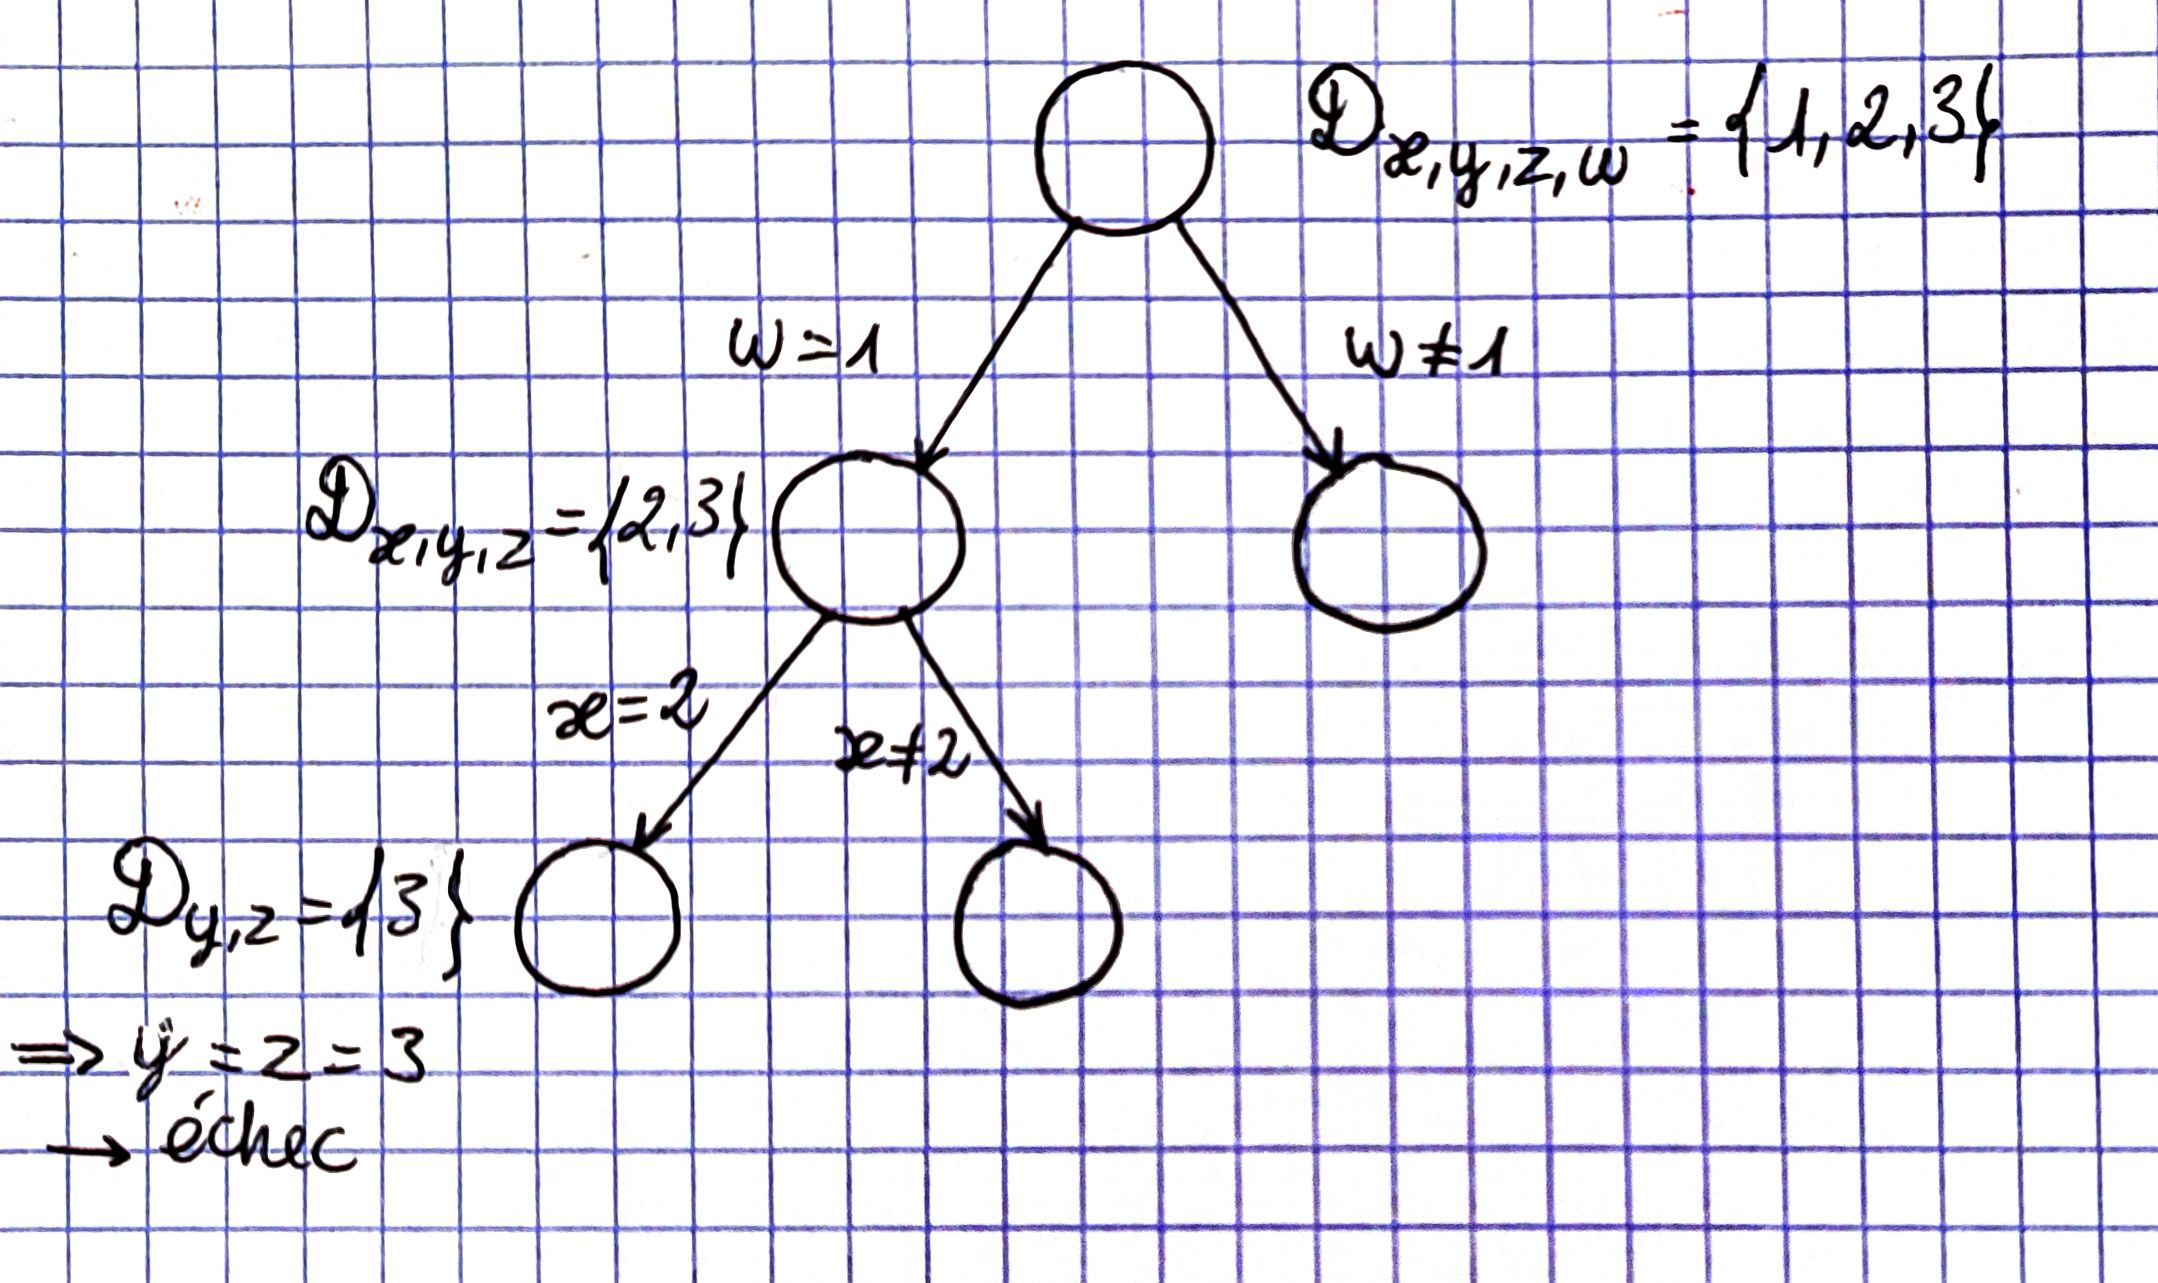


How many decisions did you take? 




Write the appropriate CP model (called model_1) and solve it. What is the size of the search tree explored? 

In [7]:
mdl1 = CpoModel(name='exercice2')
w, x, y, z = mdl1.integer_var_list(4,1,2,'x')
mdl1.add(w != x)
mdl1.add(w != y)
mdl1.add(w != z)
mdl1.add(x != y)
mdl1.add(x != z)
mdl1.add(y != z)

sol1 = mdl1.solve()
sol1.print_solution()

 ! ----------------------------------------------------------------------------
 ! Satisfiability problem - 4 variables, 6 constraints
 ! Workers              = 1
 ! Presolve             = Off
 ! SearchType           = DepthFirst
 ! Initial process time : 0.00s (0.00s extraction + 0.00s propagation)
 !  . Log search space  : 4.0 (before), 4.0 (after)
 !  . Memory usage      : 266.8 kB (before), 266.8 kB (after)
 ! Using sequential search.
 ! ----------------------------------------------------------------------------
 !               Branches  Non-fixed            Branch decision
 ! ----------------------------------------------------------------------------
 ! Search completed, model has no solution.
 ! ----------------------------------------------------------------------------
 ! Number of branches     : 2
 ! Number of fails        : 2
 ! Total memory usage     : 539.3 kB (499.5 kB CP Optimizer + 39.8 kB Concert)
 ! Time spent in solve    : 0.00s (0.00s engine + 0.00s extraction)
 !


How many failures did the solver encounter? 



In [8]:
sol1.get_solver_infos()['NumberOfFails']

2

**Exercice 3**: Create a new model (called model_2), similar to the previous one, however using one Alldifferent constraint (look for all_diff in the documentation) and solve it.

In [9]:
mdl2 = CpoModel(name='exercice3')
w, x, y, z = mdl2.integer_var_list(4,1,2,'x')
mdl2.add(all_diff([w,x,y,z]))

sol2 = mdl2.solve()
sol2.print_solution()

/tmp/ipykernel_23181/2427277360.py:3(stream:17:1): Warning: The constraint is always false, the model is infeasible.
                                                              allDiff([x_0, x_1, x_2, x_3])
 ! ----------------------------------------------------------------------------
 ! Satisfiability problem - 4 variables, 1 constraint
 ! Workers              = 1
 ! Presolve             = Off
 ! SearchType           = DepthFirst
 ! Initial process time : 0.00s (0.00s extraction + 0.00s propagation)
 !  . Log search space  : 4.0 (before), 4.0 (after)
 !  . Memory usage      : 266.8 kB (before), 266.8 kB (after)
 ! Using sequential search.
 ! ----------------------------------------------------------------------------
 !               Branches  Non-fixed            Branch decision
 ! ----------------------------------------------------------------------------
 ! Search completed, model has no solution.
 ! ----------------------------------------------------------------------------
 

What is the size of the search tree explored? How can you explain this? **With global constraints, the solver notices instantly that we have 4 different variables with only 2 possible values. It does not need to start searching, it notices that no solution is possible.**

In [10]:
sol2.get_solver_infos()['NumberOfChoicePoints']

0

We will push this observation to a larger scale. 

**Exercice 4**: Let $n$ be a natural number and consider the following CSP: 

- Variables $x_1, x_2, \ldots x_n$
- Domains: $\forall i \in [1,n], \cal{D}(x_i) = \{1, 2 , \ldots n-1\}$ 
- Constraints: $\forall i \neq j,  x_i \ne x_j$


Without using the solver, is this problem satisfiable? Why? **No it is not satisfiable because we have n variables and n-1 possible values. But all variables should be different so it is not possible.**

Write a function model_decomposition(n) that takes as input an integer $n$ and returns the CSP model of this problem using only binary inequalities (i.e., no global constraints)

In [11]:
def model_decomposition(n):
    mdl = CpoModel(name='model_decomposition')
    X = mdl.integer_var_list(n,1,n-1,'x')
    for i in range(n):
        for j in range(i+1,n):
            if j!=i:
                mdl.add(X[i] != X[j])
    return mdl

Call this function for $n= 10$ then solve this problem and plots the dlifferent statistics. How many nodes did the solver explore? What is the CPU time? 

In [12]:
mdl3=model_decomposition(10)
sol3 = mdl3.solve(trace_log=False)
sol3.get_solver_infos()

{'AverageFailDepth': 7.17101,
 'DepthFirstAverageIdleTime': 0,
 'DepthFirstIdleTime': 0,
 'DepthFirstIdleTimePercentage': 0,
 'DeterministicTimePerBranch': 1.57927,
 'EffectiveDepthFirstWorkers': 1,
 'EffectiveIterativeDivingWorkers': 0,
 'EffectiveMultiPointWorkers': 0,
 'EffectiveOptimalityTolerance': 'infinity',
 'EffectiveRestartWorkers': 0,
 'EffectiveWorkers': 1,
 'EngineAverageIdleTime': 0,
 'EngineIdleTime': 0,
 'EngineIdleTimeCount': 0,
 'EngineIdleTimePercentage': 0,
 'EngineIdleTimeSum': 0,
 'EngineMaxIdleTime': 0,
 'EngineMemoryUsage': 341379,
 'ExtractionTime': 0,
 'FailDepthCount': 362881,
 'FailDepthSum': 2602224,
 'FailStatus': 'SearchHasFailedNormally',
 'Gap': 'infinity',
 'IterativeDivingAverageIdleTime': 0,
 'IterativeDivingIdleTime': 0,
 'IterativeDivingIdleTimePercentage': 0,
 'MemoryUsage': 521507,
 'MultiPointAverageIdleTime': 0,
 'MultiPointIdleTime': 0,
 'MultiPointIdleTimePercentage': 0,
 'NumberOfAuxiliaryVariables': 0,
 'NumberOfBranches': 725758,
 'NumberO

In [13]:
print("Number of nodes:",sol3.get_solver_infos()['NumberOfChoicePoints'], "\nCPU Time:",sol3.get_solver_infos()['TotalTime'])

Number of nodes: 362879 
CPU Time: 0.73


Write a function model_using_alldiff(n) that takes as input an integer $n$ and returns the CSP model of this problem using only one ALLDifferent constraint.


In [14]:
def model_using_alldiff(n):
    mdl = CpoModel(name='model_all_different')
    X = mdl.integer_var_list(n,1,n-1,'x')
    mdl.add(all_diff(X))
    return mdl

Call this function for  n=10  then solve this problem and print the dlifferent statistics. How many nodes did the solver explore? What is the CPU time? 

In [15]:
mdl4=model_using_alldiff(15)
sol4 = mdl4.solve(trace_log=False)
sol4.get_solver_infos()

{'AverageFailDepth': 0,
 'DepthFirstAverageIdleTime': 0,
 'DepthFirstIdleTime': 0,
 'DepthFirstIdleTimePercentage': 0,
 'DeterministicTimePerBranch': 0,
 'EffectiveDepthFirstWorkers': 1,
 'EffectiveIterativeDivingWorkers': 0,
 'EffectiveMultiPointWorkers': 0,
 'EffectiveOptimalityTolerance': 'infinity',
 'EffectiveRestartWorkers': 0,
 'EffectiveWorkers': 1,
 'EngineAverageIdleTime': 0,
 'EngineIdleTime': 0,
 'EngineIdleTimeCount': 0,
 'EngineIdleTimePercentage': 0,
 'EngineIdleTimeSum': 0,
 'EngineMaxIdleTime': 0,
 'EngineMemoryUsage': 324212,
 'ExtractionTime': 0,
 'FailDepthCount': 0,
 'FailDepthSum': 0,
 'FailStatus': 'SearchHasFailedNormally',
 'Gap': 'infinity',
 'IterativeDivingAverageIdleTime': 0,
 'IterativeDivingIdleTime': 0,
 'IterativeDivingIdleTimePercentage': 0,
 'MemoryUsage': 504340,
 'MultiPointAverageIdleTime': 0,
 'MultiPointIdleTime': 0,
 'MultiPointIdleTimePercentage': 0,
 'NumberOfAuxiliaryVariables': 0,
 'NumberOfBranches': 0,
 'NumberOfChoicePoints': 0,
 'NumberO

In [16]:
print("Number of nodes:",sol3.get_solver_infos()['NumberOfChoicePoints'], "\nCPU Time:",sol3.get_solver_infos()['TotalTime'])

Number of nodes: 362879 
CPU Time: 0.73


Do you start to appretiate global constraints? Why?  

**Of course, because we can detect unfeasable cases imediately which is such a gain of time! It is also faster and easier to add the constraints while writing the function.**

We will evaluate properly the model using the decomposition model_decomposition(n) with the model using the global constraint model_using_alldiff(n). For this reason we will increase the value of $n$ from 3 to $20$ and plot the runtime and the number of nodes for each model. 

In order to keep the runtime under control, we will limit the solver to 15 seconds per call using 

```
solve( TimeLimit=15, LogPeriod=100000)
```

You can use additionnal parameter as mentionned in the documentation such as 
LogVerbosity taht can gave the values ['Quiet', 'Terse', 'Normal', 'Verbose'], and LogPeriod used fot the solver log in size. You can play with these arguments

Have a look at the different parameters we can indicate to the solve function. A better and modular way to play with parameters is to use CpoParameters. 

Example : 

```
from docplex.cp.parameters import CpoParameters


params = CpoParameters(TimeLimit=10, LogVerbosity='Quiet’, LogPeriod=900000)


••• 
sol = model.solve(TimeLimit= params.TimeLimit , LogVerbosity = params.LogPeriod )


```


When a solver hits the time timit, it will simply stop the search and says that it couldn't solve the problem within the time limit. 

Write a function $run(model, params)$ that run the solver on the model $model$ using the parameters $params$. The function returns the tuple of statistics [number of nodes, total runtime, search status]

In [25]:
from docplex.cp.parameters import CpoParameters
def run(model, params):
    sol=model.solve(trace_log=False, TimeLimit=params.TimeLimit, LogVerbosity=params.LogVerbosity, LogPeriod=params.LogPeriod)
    return (sol.get_solver_infos()['NumberOfChoicePoints'], sol.get_solver_infos()['TotalTime'], sol.get_solver_infos()['SearchStatus'])

Using the $run(model, params)$ function, run the two models model_decomposition(n) and model_using_alldiff(n) for $n \in [3,20]$ using a maximim timelimit of $15$s 

In [26]:
print(run(model_decomposition(10), CpoParameters(TimeLimit=10, LogVerbosity='Quiet', LogPeriod=900000)),
      run(model_using_alldiff(10), CpoParameters(TimeLimit=10, LogVerbosity='Quiet', LogPeriod=900000)))

(362879, 1.48, 'SearchCompleted') (0, 0, 'SearchCompleted')


Give two plots to compare the two models. The first one is to evalue the runtime and the second one to to evalute the size of the search tree. 

Compare the performances of these models? 

/tmp/ipykernel_23181/3695901524.py:4(stream:16:1): Warning: The constraint is always false, the model is infeasible.
                                                              allDiff([x_0, x_1, x_2])
/tmp/ipykernel_23181/3695901524.py:4(stream:17:1): Warning: The constraint is always false, the model is infeasible.
                                                              allDiff([x_0, x_1, x_2, x_3])
/tmp/ipykernel_23181/3695901524.py:4(stream:18:1): Warning: The constraint is always false, the model is infeasible.
                                                              allDiff([x_0, x_1, x_2, x_3, x_4])
/tmp/ipykernel_23181/3695901524.py:4(stream:19:1): Warning: The constraint is always false, the model is infeasible.
                                                              allDiff([x_0, x_1, x_2, x_3, x_4, x_5])
/tmp/ipykernel_23181/3695901524.py:4(stream:20:1): Warning: The constraint is always false, the model is infeasible.
                                     

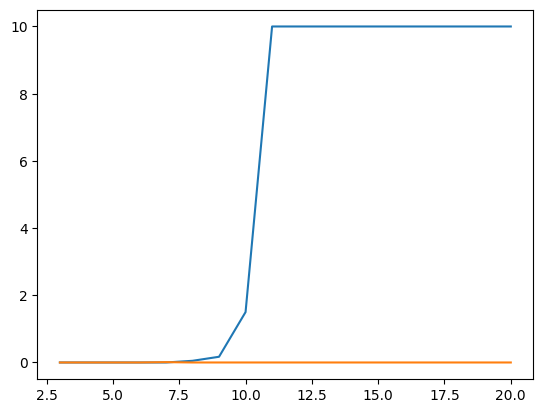

In [21]:
import matplotlib.pyplot as plt

X = range(3,21)
Y_decomposition = []
Y_alldiff = []
for i in X:
    Y_decomposition.append(run(model_decomposition(i), CpoParameters(TimeLimit=10, LogVerbosity='Quiet', 
                                                                     LogPeriod=900000))[1])
    Y_alldiff.append(run(model_using_alldiff(i), CpoParameters(TimeLimit=10, LogVerbosity='Quiet', 
                                                               LogPeriod=900000))[1])
plt.plot(X,Y_decomposition)
plt.plot(X,Y_alldiff)

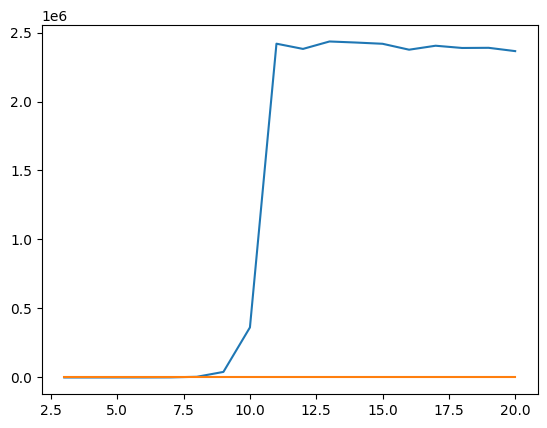

In [29]:
X = range(3,21)
Y_decomposition = []
Y_alldiff = []
for i in X:
    Y_decomposition.append(run(model_decomposition(i), CpoParameters(TimeLimit=10, LogVerbosity='Quiet', 
                                                                     LogPeriod=900000))[0])
    Y_alldiff.append(run(model_using_alldiff(i), CpoParameters(TimeLimit=10, LogVerbosity='Quiet', 
                                                               LogPeriod=900000))[0])
plt.plot(X,Y_decomposition)
plt.plot(X,Y_alldiff)

Using the model_alldiff(n), solve this problem for $n=  \{10, 100, 1000, 10000, 100000 \}$. Whar are the values of the runtime and the number of nodes? 

In [27]:
X = [10,100,1000,10000,100000]
Y_alldiff_runtime = []
Y_alldiff_nb_nodes = []
for i in X:
    Y_alldiff_runtime.append(run(model_using_alldiff(i), CpoParameters(TimeLimit=10, LogVerbosity='Quiet', 
                                                               LogPeriod=900000))[1])
    Y_alldiff_nb_nodes.append(run(model_using_alldiff(i), CpoParameters(TimeLimit=10, LogVerbosity='Quiet', 
                                                               LogPeriod=900000))[0])
print("Runtime:\n", Y_alldiff_runtime, "\nNodes:\n", Y_alldiff_nb_nodes)

Runtime:
 [0, 0, 0, 0.01, 0.15] 
Nodes:
 [0, 0, 0, 0, 0]


What's your overall impression ? what did you learn today? 

**Global constraints are really efficient.**